<a href="https://colab.research.google.com/github/dipankarsahu1000/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store App Review Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/dipankarsahu1000

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know The Data***

### **Import Libraries**

In [451]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from datetime import datetime
import warnings

### **Dataset Loading**

In [452]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [453]:
# Loading the datasets
path = '/content/drive/MyDrive/Almabetter: Full Stack Data Science/Projects/Exploratory Data Analysis/Play Store App Review Analysis/Datasets/'

# Assigning the dataset contained in the Play Store Data.csv file into the following DataFrame:
ps_df = pd.read_csv(path +'Play Store Data.csv')

# Assigning the dataset contained in the User Reviews.csv file into the following DataFrame:
ur_df = pd.read_csv(path +'User Reviews.csv')


In [454]:
# Defining colors of some output texts:
YELLOW = "\033[33m"
BLUE = "\033[34m"
RESET = "\033[0m"
BOLD = "\033[1m"

### **Dataset First View**

In [455]:
# First View of the Play Store Data:
print(BOLD + YELLOW + "The first view of the Play Store Data is:" + RESET)
ps_df.head()

The first view of the Play Store Data is:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [456]:
# First View of the User Reviews Data:
print(BOLD + BLUE + "The first view of the Play Store Data is:" + RESET)
ur_df.head()

The first view of the Play Store Data is:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### **Dataset Rows & Columns count**

In [457]:
# Dataset Rows & Columns count

# First, checking the number of columns and rows in the Play Store Dataset:
row_ps = ps_df.shape[0]
col_ps = ps_df.shape[1]

print(BOLD + YELLOW + f"The Play Store Dataset has {row_ps} rows and {col_ps} columns." + RESET)

The Play Store Dataset has 10841 rows and 13 columns.


In [458]:
# Next, checking the number of columns and rows in the User Reviews Dataset:
row_ur = ur_df.shape[0]
col_ur = ur_df.shape[1]

print(BOLD + BLUE + f"The User Dataset has {row_ur} rows and {col_ur} columns." + RESET)

The User Dataset has 64295 rows and 5 columns.


### **Dataset Information**

In [459]:
# Play Store Dataset Info
print(BOLD + YELLOW + "The Play Store Dataset Info:" + RESET)
ps_df.info()

The Play Store Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [460]:
# User Review Dataset Info
print(BOLD + BLUE + "The User Reviews Dataset Info:" + RESET)
ur_df.info()

The User Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### **Duplicate Values**

In [461]:
# Dataset Duplicate Value Count for the Play Store Dataset

ps_dup_count = len(ps_df[ps_df.duplicated()])

print(BOLD + YELLOW + f"There are {ps_dup_count} duplicate values in the Play Store Dataset." + RESET)

There are 483 duplicate values in the Play Store Dataset.


In [462]:
# Dataset Duplicate Value Count for the User Reviews Dataset

ur_dup_count = len(ur_df[ur_df.duplicated()])

print(BOLD + BLUE + f"There are {ur_dup_count} duplicate values in the User Reviews Dataset." + RESET)

There are 33616 duplicate values in the User Reviews Dataset.


#### **Missing Values/Null Values**

In [463]:
# Missing Values/Null Values Count for the Play Store Dataset

ps_null_count = ps_df.isnull().sum().sum()      
# 'sum()' is being used twice because in the first time it will just give the sum of the values under each column in the form of a Series,
# and in the second time it will return the total sum.

print(BOLD + YELLOW + f"There are total {ps_null_count} missing/null values for the Play Store Dataset." + RESET)



There are total 1487 missing/null values for the Play Store Dataset.


In [464]:
# Missing Values/Null Values Count for the User Reviews Dataset

ur_null_count = ur_df.isnull().sum().sum()
print(BOLD + BLUE + f"There are total {ur_null_count} missing/null values for the User Reviews Dataset." + RESET)

There are total 107457 missing/null values for the User Reviews Dataset.


In [465]:
# Checking the missing values per column in the Play Store Dataset
print(BOLD + YELLOW + "The missing values per column in the Play Store Dataset:" + RESET)
ps_df.isnull().sum()

The missing values per column in the Play Store Dataset:


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [466]:
# Checking the missing values per column in the User Reviews Dataset
print(BOLD + BLUE + "The missing values per column in the User Reviews Dataset:" + RESET)
ur_df.isnull().sum()

The missing values per column in the User Reviews Dataset:


App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

[None, None]

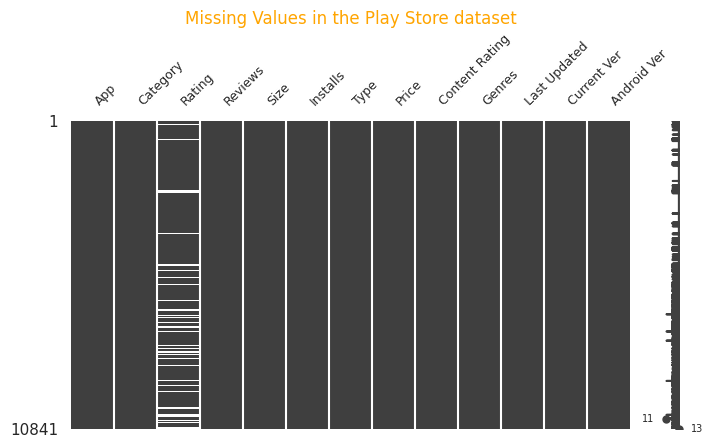

In [467]:
# Visualizing the missing values for the Play Store Dataset
msno.matrix(ps_df, figsize = (8, 4), fontsize = 9)

# missingno (alias: msno) is a library used specially for visualising missing data. Here, msno.matrix() will visualise the missing data in a matrix form.

title_missval_ps = plt.title('Missing Values in the Play Store dataset')
plt.setp(title_missval_ps, color = 'orange')

In the above data matrix of the missing values in the Play Store dataset, it can be said that most of the missing values belong to the 'Rating' column.

[None, None]

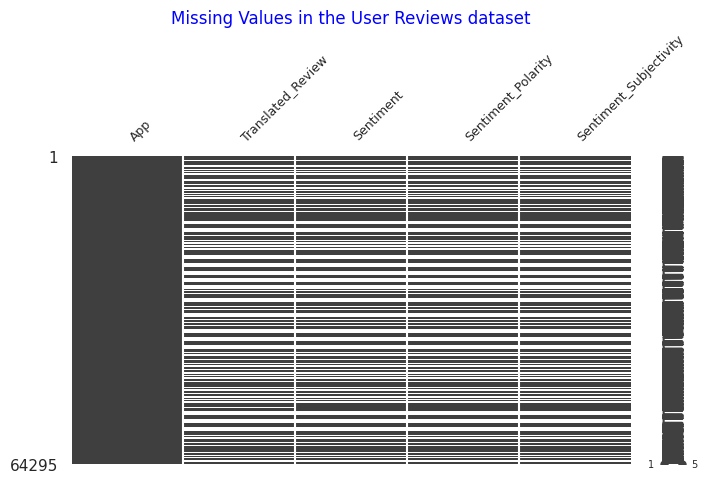

In [468]:
# Visualizing the missing values for the User Reviews Dataset

msno.matrix(ur_df, figsize = (8, 4), fontsize = 9)
title_missval_ur = plt.title('Missing Values in the User Reviews dataset')
plt.setp(title_missval_ur, color= 'blue')

In the above data matrix of the missing values in the User Reviews dataset, it can be said that all the columns except the 'App' column contain atleast some missing values.

### What did you know about your dataset?

Answer Here

## ***2. Understanding The Variables***

**i. For the Play Store Dataset -**

In [469]:
# Play Store Dataset Columns
print(BOLD + YELLOW + "The columns of the Play Store Dataset:" + RESET)
ps_df.columns

The columns of the Play Store Dataset:


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [470]:
# Play Store Dataset Describe
print(BOLD + YELLOW + "The Play Store Dataset is described as:" + RESET)
ps_df.describe()

# The 'Rating' column is the only one column containing numerical values (float64).

The Play Store Dataset is described as:


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**ii. For the User Reviews Dataset -**

In [471]:
# User Revies Dataset Columns
print(BOLD + BLUE + "The columns of the User Reviews Dataset:" + RESET)
ur_df.columns

The columns of the User Reviews Dataset:


Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [472]:
# User Reviews Dataset Describe
print(BOLD + BLUE + "The User Reviews Dataset is described as:" + RESET)
ur_df.describe()

# The columns 'Sentiment_Polarity' and 'Sentiment_Subjectivity' are the only two columns containing numerical values (float64).

The User Reviews Dataset is described as:


,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### **Variables Description**

<b><font color = 'orange'> 
All the variables in the Play Store Dataset are:
</font></b>

* **App**: The name of the app.
* **Category**: The category to which the app belongs to.
* **Rating**: The ratings (out of 5) given by the users to that particular app.
* **Reviews**: The number of reviews given by the users to that particular app.
* **Size**: The space required in the phone's memory to install that app.
* **Installs**: The number of times that app has been installed by various users.
* **Type**: Tells whether the app is free or paid.
* **Price**: The price of the app if the app is paid, the price would be 0 if it is free.
* **Content Rating**: The Age group for which the app is suitable for.
* **Genres**: The genre(s) of the app.
* **Last Updated**: The date on which the latest update for the app was released.
* **Current Ver**: The current version of the app.
* **Android Ver**: The android version that can support the app.




<b><font color = 'cyan'> 
All the variables in the User Reviews Dataset are:
</font></b>

* **App**: The name of the app.
* **Translated_Review**: The reviews given by the users translated to English.
* **Sentiment**: The sentiment of the users towards that app. It can be Positive, Negative or Neutral.
* **Sentiment_Polarity**: A measure of the sentiment. It has a range of [ -1, 1 ]. The more negative the number is, the more negative is the sentiment and the more positive it is, the more postive is the sentiment. If it is somewhere around 0, then it is a neutral sentiment.
* **Sentiment_Subjectivity**: It defines how subjective are the reviews, or simply, by how much are the sentiments influenced by the personal opinions of the user. It has a range of [ 0, 1]. More closer it is to 0, the more objective (unbiased or free of personal opinions) are the sentiments, and the more closer it is to 1, the more subjective (biased or influenced by personal opinions) are the sentiments.

### **Check Unique Values for each variable**

In [473]:
def unique_val(df):
  '''
  Returns a DataFrame with only the unique values under each column. 
  
  Note: In this DataFrame of unique values, the values along an individual row are NOT related.
  Under each column, the unique values for that variable are just mentioned. Although the empty cells will be filled up with NaN values, but that can be taken care of later.
  The main aim is to just see the unique values under each column.
  '''
  df_unique = pd.DataFrame()
  for column in df.columns:
    if column == 'App' or column == 'Translated_Review':
      continue
    df_unique = pd.concat([df_unique, pd.Series(df[column].unique(), name = 'Unique_' + column)], axis = 1)
  return df_unique


In [474]:
print(BOLD + YELLOW + "The unique values for each the column in the Play Store dataset:" + RESET)
ps_df_unique = unique_val(ps_df)
ps_df_unique

The unique values for each the column in the Play Store dataset:


,Unique_Category,Unique_Rating,Unique_Reviews,Unique_Size,Unique_Installs,Unique_Type,Unique_Price,Unique_Content Rating,Unique_Genres,Unique_Last Updated,Unique_Current Ver,Unique_Android Ver
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,AUTO_AND_VEHICLES,3.9,967,14M,"500,000+",Paid,$4.99,Teen,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.2 and up
2,BEAUTY,4.7,87510,8.7M,"5,000,000+",NaN,$3.99,Everyone 10+,Art & Design;Creativity,"August 1, 2018",1.2.4,4.4 and up
3,BOOKS_AND_REFERENCE,4.5,215644,25M,"50,000,000+",0,$6.99,Mature 17+,Art & Design;Action & Adventure,"June 8, 2018",Varies with device,2.3 and up
4,BUSINESS,4.3,167,2.8M,"100,000+",NaN,$1.49,Adults only 18+,Auto & Vehicles,"June 20, 2018",1.1,3.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
5997,NaN,NaN,885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5998,NaN,NaN,88486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5999,NaN,NaN,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6000,NaN,NaN,1195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [475]:
print(BOLD + BLUE + "The unique values for each the column in the User Reviews dataset:" + RESET)
ur_df_unique = unique_val(ur_df)
ur_df_unique

The unique values for each the column in the User Reviews dataset:


,Unique_Sentiment,Unique_Sentiment_Polarity,Unique_Sentiment_Subjectivity
0,Positive,1.000000,0.533333
1,NaN,0.250000,0.288462
2,Neutral,NaN,NaN
3,Negative,0.400000,0.875000
4,NaN,0.600000,0.300000
...,...,...,...
5406,NaN,0.183929,NaN
5407,NaN,0.359167,NaN
5408,NaN,-0.528571,NaN
5409,NaN,-0.377778,NaN


## ***3. Data Wrangling for the Play Store Dataset***

<b><font color = "orange">
Starting with the Play Store dataset, before moving unto the User Reviews part.</font></b>

### **Data Wrangling Code**

####**i. Taking care of the duplicate values**

Earlier, while checking for the duplicate values in the Play Store dataset, it was found that there are `483 duplicate values` in the dataset. I will do a bit of checking up on this.

In [476]:
ps_df[ps_df.duplicated()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up


Let's pick a random app, say 'Google My Business' and then check how many times it appears in the dataset.

In [477]:
ps_df[ps_df['App'] ==  'Google My Business']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up


As it can be seen that for the app named 'Google My Business', there are three rows having the exact same values for all the columns.

It is better to `remove all the duplicate rows`, so that it won't affect any further analysis.

In [478]:
# Dropping all the rows related to.
ps_df = ps_df.drop_duplicates('App', keep = 'first').reset_index(drop = True)

In [479]:
# Showing off that the Play Store dataset doesn't contain any duplicate values anymore.
ps_df[ps_df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [480]:
# Again checking with our preferred app "Googe My Business", just to show that there is now only one entry for it.
ps_df[ps_df['App'] == 'Google My Business']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up


So, now the Play Store dataset contains no duplicate value.

####**ii. Taking care of the null values**

In the first section of this analysis, I have already taken a look at the null values in the dataset. Now, it is time to dive deeper.

In [481]:
ps_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There are `3 null values in the 'Android Ver' column`. Checking out the corresponding rows for which the values under the 'Android Ver' column is null.

In [482]:
ps_df[ps_df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3549,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
3586,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The row corresponding to `index number 9300 seems to be an irregularity`, all of its values are under incorrect columns, so it is better to `drop that row`.

As for the other two rows, the `null values can be replaced with the mode` of that feature.

In [483]:
# Dropping the entire row showing irregular characteristic.
ps_df = ps_df.drop(index = 9300).reset_index(drop = True)    

# Calculating the mode value under the 'Android Ver' column and replacing the null values for the remaining.
android_ver_mode = ps_df['Android Ver'].mode()[0]
ps_df['Android Ver'] = ps_df['Android Ver'].fillna(android_ver_mode)

In [484]:
# Checking for the remaining rows.
ps_df[(ps_df['App'] == '[substratum] Vacuum: P') | (ps_df['App'] == 'Pi Dark [substratum]')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3549,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
3586,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


There are also `8 null values in the 'Current Ver' column`. Checking out the corresponding rows for which the values under the 'Android Ver' column is null.

In [485]:
ps_df[ps_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1265,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5314,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
5772,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
6287,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
6360,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
6671,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9170,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


The null values under the 'Current Ver' column `can be replaced with the mode`.

In [486]:
# Calculating the mode value under the "Current Ver" column and replacing the null values.
current_ver_mode = ps_df['Current Ver'].mode()[0]
ps_df['Current Ver'] = ps_df['Current Ver'].fillna(current_ver_mode)

Now, there is `one null value under the 'Type' column` and `one null value under the 'Content Rating' column`.

In [487]:
# Checking the row with the null value under the "Type" column.
ps_df[ps_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8028,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


The above row doesn't seem to be much insightful. So, it is better to just drop it.

In [488]:
# Dropping that specific row.
ps_df = ps_df.drop(index = ps_df[ps_df['Type'].isnull()].index[0]).reset_index(drop = True)   

In [489]:
# Checking the row with the null value under the "Content Rating" column.
ps_df[ps_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There is no null value for the 'Content Rating' column anymore! Maybe that row got dropped during one of the previous cleaning operations.

In [490]:
ps_df.isnull().sum()

App                  0
Category             0
Rating            1462
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

Now, all that remains is the `'Rating' column` with a massive number of `1462 null values`.

In [491]:
ps_df[ps_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
9642,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
9648,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
9652,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Before such huge number of datapoints be manipulated, it better check its distribution first.

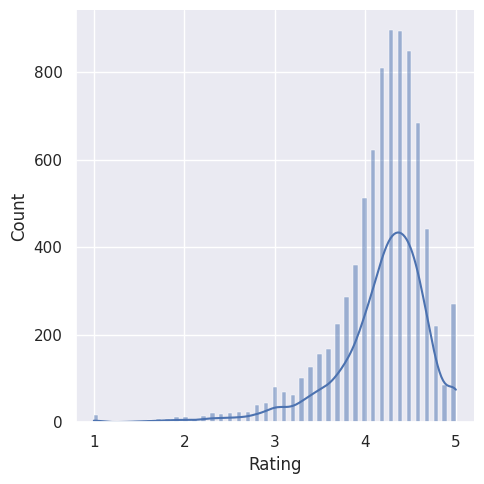

In [492]:
sns.displot(ps_df['Rating'], kde = True)

In [493]:
# Calculating the mode and the median of the "Rating" column.
rating_mode = ps_df['Rating'].mode()[0]
rating_median = ps_df['Rating'].median()
rating_mean = ps_df['Rating'].mean()
print(f"Mode: {rating_mode}, Median: {rating_median} and Mean: {round(rating_mean, 1)}")

Mode: 4.3, Median: 4.3 and Mean: 4.2


The mode and the median of the 'Rating' column is same. The null values can be filled with either of them.

In [494]:
# Filling the null values under the "Rating" column with the median value.
ps_df['Rating'] = ps_df['Rating'].fillna(rating_median)

In [495]:
ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

So, with that, we have successfully dealt with issue of null values in the dataset!

####**iii. Transforming the datatypes of the columns**

First, let's recheck the info the Play Store dataset.

In [496]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658 entries, 0 to 9657
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Reviews         9658 non-null   object 
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   object 
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9658 non-null   object 
 12  Android Ver     9658 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.0+ KB


In [497]:
# Also, check for the head of the dataset, so that it can be pointed which of the columns' datatypes need to be transformed.
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [498]:
# Checking the exact datatype of the values under the "App" and "Category" column.
print(type(ps_df['App'][0]))
print(type(ps_df['Category'][0]))

<class 'str'>
<class 'str'>


The first two `columns 'App' and 'Category' are of type 'string'` as expected, and the `'Rating' column is of type 'float'` (mentioned in the info).

**a. Reviews:**

The `column 'Reviews' should be of a numerical datatype`.

In [499]:
ps_df['Reviews'] = ps_df['Reviews'].astype(int)

**b. Size:**

The `column 'Size'` needs to be converted next.

In [500]:
ps_df['Size'].value_counts()

Varies with device    1226
11M                    182
12M                    181
14M                    177
13M                    177
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

The values under the `'Size' column are in megabytes or MB (as 'M') and in kilobytes or KB (as 'k')`. It will be better if all the values are in MB.

In [501]:
def convert_to_mb(value):
  '''
  This will take a value from the column as input, then return the value in MB if it is in KB, or as it is if already in MB. 
  The units such 'M' and 'k' will be removed too.  
  '''
  if "k" in value:
    value = value.replace("k", "")
    output = round(float(value)/1024, 2)
  elif "M" in value:
    output = float(value.replace("M", ""))
  else:
    output = value
  return output

In [502]:
ps_df['Size'] = ps_df['Size'].apply(convert_to_mb)

The column `'Size' also hasa string value named 'Varies with device'` under it. 

In [503]:
# Counting the number of rows that has 'Varies with device' under the 'Size' column.
ps_df[ps_df['Size'] == 'Varies with device'].shape[0]

1226

There are `1226` rows having this string `'Varies with device'` under the 'Size'. The number of rows is too large, so better to leave this column as it is for now.

**c. Installs:**

Now, to reformat the values under the `'Installs' column`.

In [504]:
ps_df['Installs'].value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Name: Installs, dtype: int64

In [505]:
def string_to_int(value):
  '''
  This function will take string values as input and convert them into integers.
  If there are characters like ',' and '+', it will remove them too.
  '''
  if '+' in value:
    value = value.replace("+", "")
  if ',' in value:
    value = value.replace(",", "")
  return int(value)


In [506]:
ps_df['Installs'] = ps_df['Installs'].apply(string_to_int)

In [507]:
ps_df['Installs'].value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               14
Name: Installs, dtype: int64

Note: Basically, in this scenario, 'Installs' would mean the minimum number of installs for that app, or would mean something like 'atleast this many installs have been done for that app'.

**d. Price:**

Now, for the `'Price' column`.

In [508]:
ps_df['Price'].value_counts()

0          8902
$0.99       145
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

The `'$' sign needs to be removed` and then `values under the 'Price' column needs to be converted to a float value`.

In [509]:
def string_to_float(value):
  '''
  This function will take the string values as the input and convert them into floats.
  If there are characters like '$' in the value, it will remove them.
  '''
  if '$' in value:
    value = value.replace("$", "")
  return float(value)

In [510]:
ps_df['Price'] = ps_df['Price'].apply(string_to_float)

**e. Genres:**

The values under the `'Genres' column` contains the values mentioning the genre(s) of the app. For some apps, there are different genres mentioned, for such values, the individual genres can be stored in a list format.

In [511]:
ps_df['Genres'].value_counts()

Tools                              826
Entertainment                      561
Education                          510
Business                           420
Medical                            395
                                  ... 
Art & Design;Pretend Play            1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Art & Design;Action & Adventure      1
Strategy;Creativity                  1
Name: Genres, Length: 118, dtype: int64

In [512]:
# Splitting the different genres mentioned as individual string values, then storing them in lists.
ps_df['Genres'] = ps_df['Genres'].apply(lambda x: x.split(";"))

In [513]:
# Checking:
ps_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,[Art & Design],"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,"[Art & Design, Pretend Play]","January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,[Art & Design],"August 1, 2018",1.2.4,4.0.3 and up


**f. Last updated:**

Tp `parse` the dates under the `'Last Updated'` from string format to datetime format.

In [514]:
ps_df['Last Updated'] = ps_df['Last Updated'].apply(lambda x: datetime.strptime(x, "%B %d, %Y"))

In [515]:
#Checking:
ps_df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,[Art & Design],2018-01-07,1.0.0,4.0.3 and up


So, that's all for transforming the datatypes of the column. I only did tranformation on those columns which I felt were crucial for further analysis. Let's take a final view at the Play Store dataset before moving onto the User Reviews dataset.

## 4. ***Data Wrangling for the User Reviews Dataset***

<b><font color = "cyan">
Now that we are done with the Play Store dataset, it's time to move into the User Reviews part.</font></b>

### **Data Wrangling Code**

For this dataset, I think there is no need to drop the duplicate values, because for one app there may be multiple reviews and sentiments. Also, there are many null values in this row (as seen earlier), so anyway there may be a need to drop many row.

####**i. Taking care of the null values**

In [516]:
# Checking the count of null values in each column:
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

First, let's go through the rows containing the null before figuring out how to deal with them.

In [517]:
# Checking the rows for which the values under the 'Translated_Review' column are null:
ur_df[ur_df['Translated_Review'].isnull()].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


In [518]:
# Checking the rows for which the values under the 'Sentiment' column are null:
ur_df[ur_df['Sentiment'].isnull()].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


In [519]:
# Checking the rows for which the values under the 'Sentiment_Polarity' column are null:
ur_df[ur_df['Sentiment_Polarity'].isnull()].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


In [520]:
# Checking the rows for which the values under the 'Sentiment_Subjectivity' column are null:
ur_df[ur_df['Sentiment_Subjectivity'].isnull()].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


There are way too many null values in this dataset. Also, having gone through the variable description for this dataset, it is not possible to impute some other values (like mode, median, etc) in place for the null values. In conclusion, it is better to just drop the rows containing the null values.

In [521]:
ur_df = ur_df.dropna().reset_index(drop = True)

In [522]:
ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


As seen earlier in the info section for the User Reviews dataset, the datatypes of the columns seem fine. So, there is no need for any further transformation.

####**ii. Sanity Checks**

Still, I will check for any oddities in the  different columns and do some `sanity checks`.

First, let's check whether values under the 'Sentiment' column are matching with the ones under the 'Sentiment_Polarity' column.

In [523]:
# For a positive sentiment, there should no negative sentiment polarity. Checking:
ur_df[(ur_df['Sentiment'] == 'Positive') & (ur_df['Sentiment_Polarity'] < 0)]

# There is something wrong with the data, even if a single row shows up.

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


In [524]:
# For a negative sentiment, there should no positive sentiment polarity. Checking:
ur_df[(ur_df['Sentiment'] == 'Negative') & (ur_df['Sentiment_Polarity'] > 0)]

# There is something wrong with the data, even if a single row shows up.

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


In [525]:
# For a neutral sentiment, the sentiment polarity should be zero. Checking if there are any non-zero sentiment polarity values: 
ur_df[(ur_df['Sentiment'] == 'Neutral') & (ur_df['Sentiment_Polarity'] != 0)]

# There is something wrong with the data, even if a single row shows up.

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


Now, let's check if the values under the 'Sentiment_Polarity' column are in the range of [-1, 1] and if the values under the 'Sentiment_Subjectivity' are in the range of [0, 1].

In [526]:
# Checking if the values under the 'Sentiment_Polarity' column lies outside the range of [-1, 1]:
ur_df[(ur_df['Sentiment_Polarity'] < -1) | (ur_df['Sentiment_Polarity'] > 1)]

# There is something wrong with the data, even if a single row shows up.

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


In [527]:
# Checking if the values under the 'Sentiment_Subjectivity' column lies outside the range of [0, 1]:
ur_df[(ur_df['Sentiment_Subjectivity'] < 0) | (ur_df['Sentiment_Subjectivity'] > 1)]

# There is something wrong with the data, even if a single row shows up.

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


Everything looks fine with the User Reviews dataset. We can now move ahead.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1: Correlation Heatmap - How the numerical variables are correlated?**

We want to find out how the numerical variables are correlated to each other. For that a `correlation heatmap` can be used.

In [528]:
# This is the correlation table that will be used for the generating the heatmap:
ps_df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.050209,0.034310,-0.018661
Reviews,0.050209,1.000000,0.625164,-0.007599
Installs,0.034310,0.625164,1.000000,-0.009406
Price,-0.018661,-0.007599,-0.009406,1.000000


The value of `correlation coefficients` lies in range of [-1, 1].
* `Positive Correlation`: When one variable increases, the other variable also increases.
* `Negative Correlation`: When one variable increases, the other variable decreases.
* `Zero Correlation`: There is no linear relationship between the variables.


<Axes: >

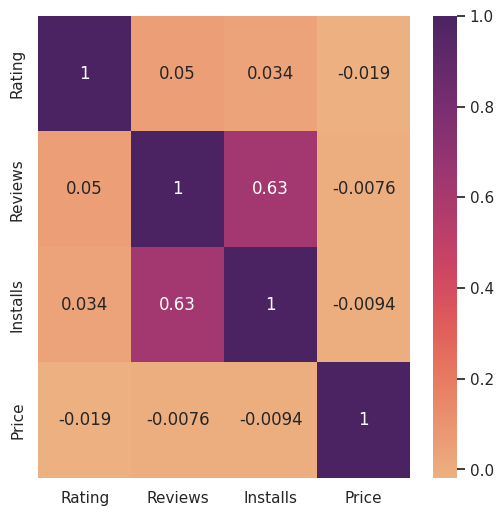

In [529]:
sns.heatmap(ps_df.corr(), annot = True, cmap = 'flare')

From the correlation heatmap, the following insights regarding the numerical variables of the Play Store dataset were gained:
* There is quite strong `positive correlation` between the `'Installs'` and the `'Reviews'`. So, the more the app has been installed by the users, the more reviews it will get. It can also imply that the app with more with more `'Reviews'` tend to get installed more by the users
* The `'Rating'` is slightly `postively correlated` with the `'Installs'`. This means that the higher rated apps tends to get installed more.
* The `'Rating'` is slightly `'negatively correlated'` with `'Price'`. This means that the apps with higher price tends to get lower ratings.
* The `'Installs'` is also slightly `'negatively correlated'` with `'Price'`. The apps with higher price don't get installed more often.


The above insights can definitely help make a positive business impact by understanding which variables to focus on to make the app a success.
For example, the price of the app can be reduced to get more installs.

#### **Chart - 2: Bar Plot -  The number of apps in each category.**

There are different categories of the apps present in the database. We are now interested in knowing the number of apps in each of these categories.

Text(0.5, 0, 'Number of Apps')

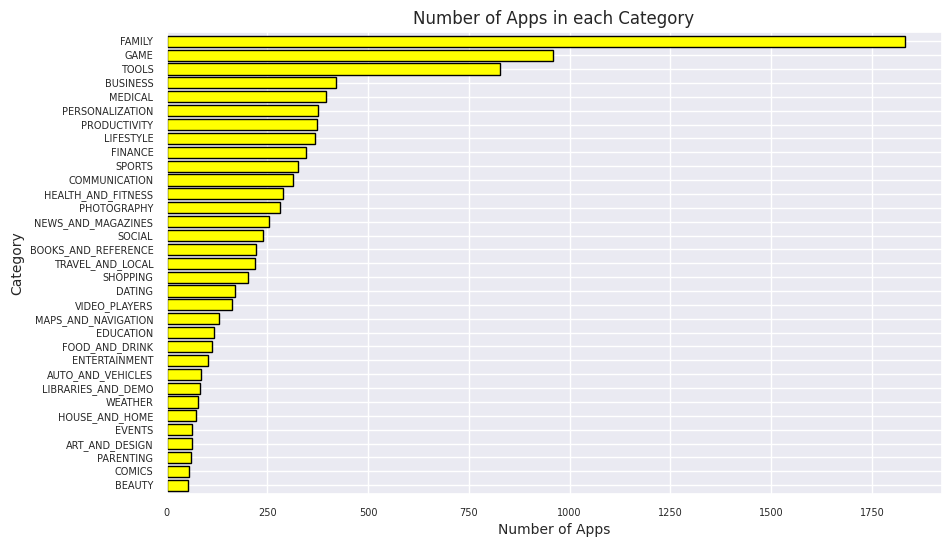

In [530]:
ps_df['Category'].value_counts().sort_values(ascending = True).plot.barh(width=0.8, color = 'yellow', edgecolor='black', fontsize = 7,  figsize = (10, 6))
plt.title('Number of Apps in each Category', fontsize = 12)
plt.ylabel('Category', fontsize = 10)
plt.xlabel('Number of Apps', fontsize = 10)

So, it can be seen that the top 3 category that have the most number of apps are:
* `Family`
* `Game`
* `Tools`

The above insight can help the developers to help understand the marketplace of the android apps. 

It can be concluded that more number of apps in a category may mean more demand for that category(we have to consider the number of installs in this regard, which will be explored in the next section). 

It can be also used to avoid the already overcrowded categories and develop apps for the niche lesser explored categories to capture that market.

#### **Chart - 3: Bar Plot -  Apps installed for each category.**

In the earlier section, we checked for the number of apps in each section. Now, we will check for the number of installs done for each category.

Text(0.5, 0, 'Number of Installs')

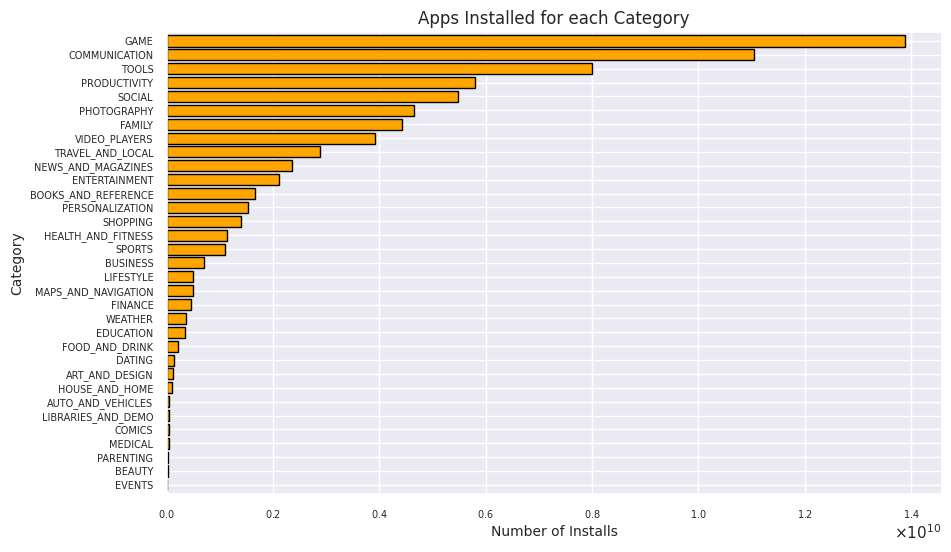

In [531]:
plt.ticklabel_format(useMathText = True)
ps_df.groupby(['Category'])['Installs'].sum().sort_values().plot.barh(width = 0.8, color = 'orange', edgecolor='black', fontsize = 7,  figsize = (10, 6))
plt.title('Apps Installed for each Category', fontsize = 12)
plt.ylabel('Category', fontsize = 10)
plt.xlabel('Number of Installs', fontsize = 10)

It can be seen that the top 3 most number of apps installed were from the following categories:
* `Game`
* `Communication`
* `Tools`

We can definitely see difference between the `'Category vs. Number of Apps'` (in the previous section) and `'Category vs. Number of Installs'`.

The number of installs for each category actually gives us a better understanding of regarding which category is more popular among users or has the higher demand, because the number of installs actually lets us know that the users are actually downloading and using the app.

#### **Chart - 4: Pie Chart -  Percentage of Free and Paid Apps**

Let's check what percent of the apps in the Play Store are Free and Paid.

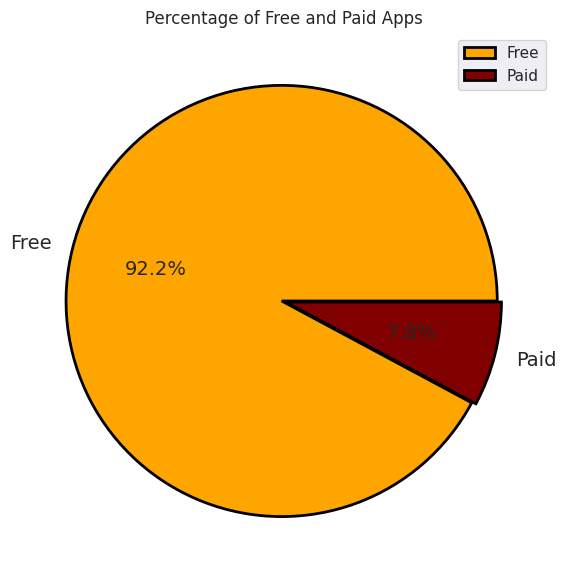

In [532]:
ps_df['Type'].value_counts().plot.pie(autopct = '%.1f%%', figsize = (7, 7), wedgeprops={'edgecolor':'black', 'linewidth': 2}, fontsize = 14, colors = ['orange', 'maroon'], explode = [0.01, 0.01])
plt.ylabel('')
plt.xlabel('')
plt.title('Percentage of Free and Paid Apps', fontsize = 12)
plt.legend()

The majority of the apps in the Play Store are free apps.
The `92.2% of the apps are free apps` and only `7.8% of the apps are paid apps`.

#### **Chart - 5: Bar Plot - Average Price of the Paid Apps for each Category**

Now, let's consider Paid apps only, what will be the average Price for each Category?

Text(0.5, 1.0, 'Average Price of the Paid Apps for each Category')

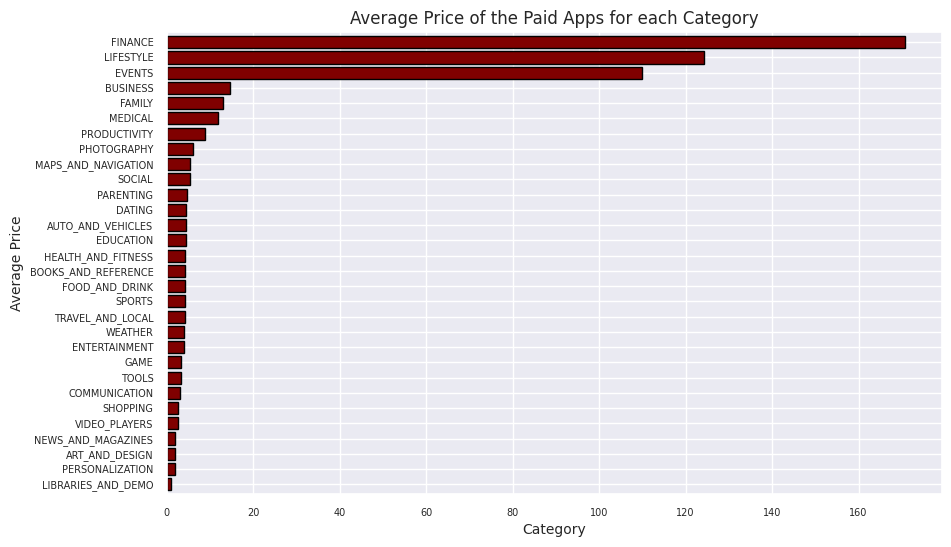

In [533]:
# Defining a separate dataframe only for the paid apps:
paid_ps_df = ps_df[ps_df['Price'] != 0]

paid_ps_df.groupby(['Category'])['Price'].mean().sort_values(ascending = True).plot.barh(width = 0.8, color = 'maroon', edgecolor='black', fontsize = 7,  figsize = (10, 6))
plt.xlabel('Category', fontsize = 10)
plt.ylabel('Average Price', fontsize = 10)
plt.title('Average Price of the Paid Apps for each Category', fontsize = 12)

The top 3 catergories with the highest average price are:
* `Finance`
* `Lifestyle`
* `Events`

#### **Chart - 6: Bar Plot - Top 20 Most High-Priced Apps**

Let's see which twenty apps are the most high-priced.

Text(0.5, 1.0, 'Top 20 Most High-Priced Apps')

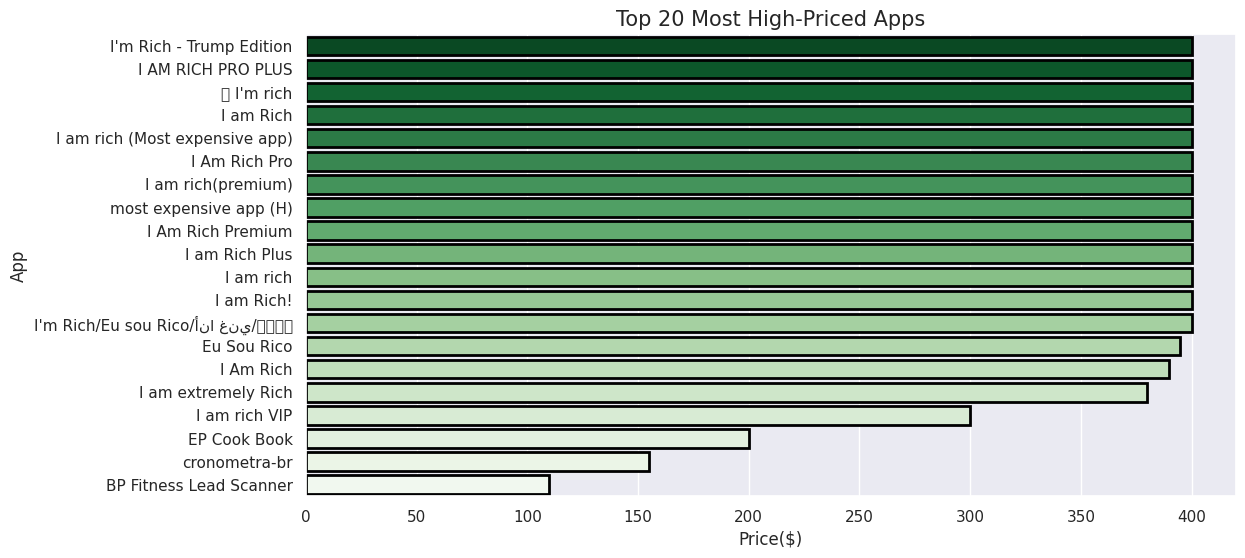

In [534]:
tt_pps_df = paid_ps_df.sort_values(by = 'Price', ascending = False).loc[:, ['App', 'Price']].head(20)

warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize": (12, 6)})
sns.barplot(data = tt_pps_df, y = 'App', x = 'Price', linewidth = 2, edgecolor = 'black', palette = 'Greens_r')
plt.xlabel('Price($)')
plt.title('Top 20 Most High-Priced Apps', fontsize = 15)

Most of the high-priced apps are some kind of funny showcase apps, meaning most of these apps are expesnive just for the sake of being expensive. 

Most of these apps are priced at around $400, that is the maximum price limit set by Google Play in the year of 2015.

#### **Chart - 7: (Grouped) Count Plot - Number of Free and Paid Apps in each Category**

Now, we wonder how many Free and Paid Apps are there in each category.

Text(0.5, 1.0, 'Number of Free and Paid Apps in each Category')

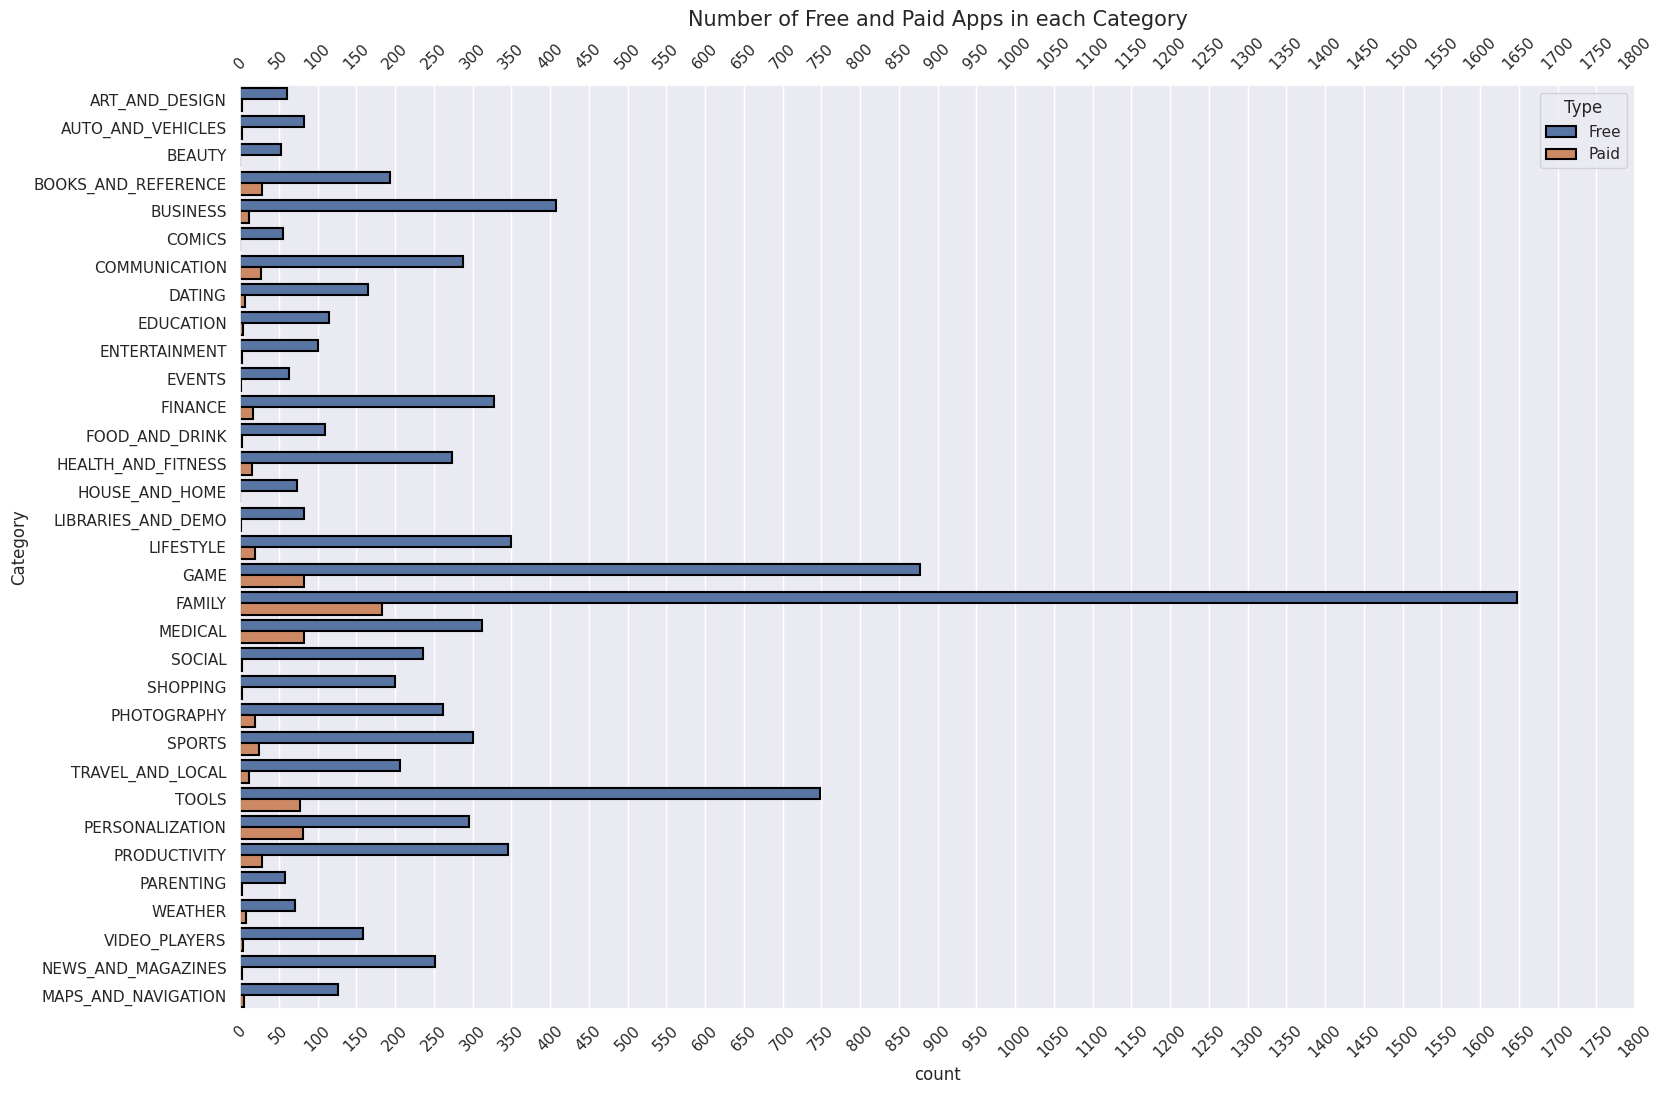

In [535]:
sns.set(rc={"figure.figsize": (18, 12)})
sns.countplot(data = ps_df, y = 'Category', hue = 'Type', edgecolor = 'black', linewidth = 1.5)

plt.tick_params(labeltop = True)
plt.xticks(range(0, 1850, 50), rotation = 45)
plt.title('Number of Free and Paid Apps in each Category', fontsize = 15)

It can be that:
* All of the cateogries have more Free apps than the Paid ones.
* The `Family` category has more number of Paid apps than the rest of the categories. 

#### **Chart - 8: Box Plot and Histogram - Distribution of Ratings**

We want to see how the ratings (out of 5) of different apps are distributed.

Text(0.5, 1.0, 'Distribution of Ratings (Box Plot)')

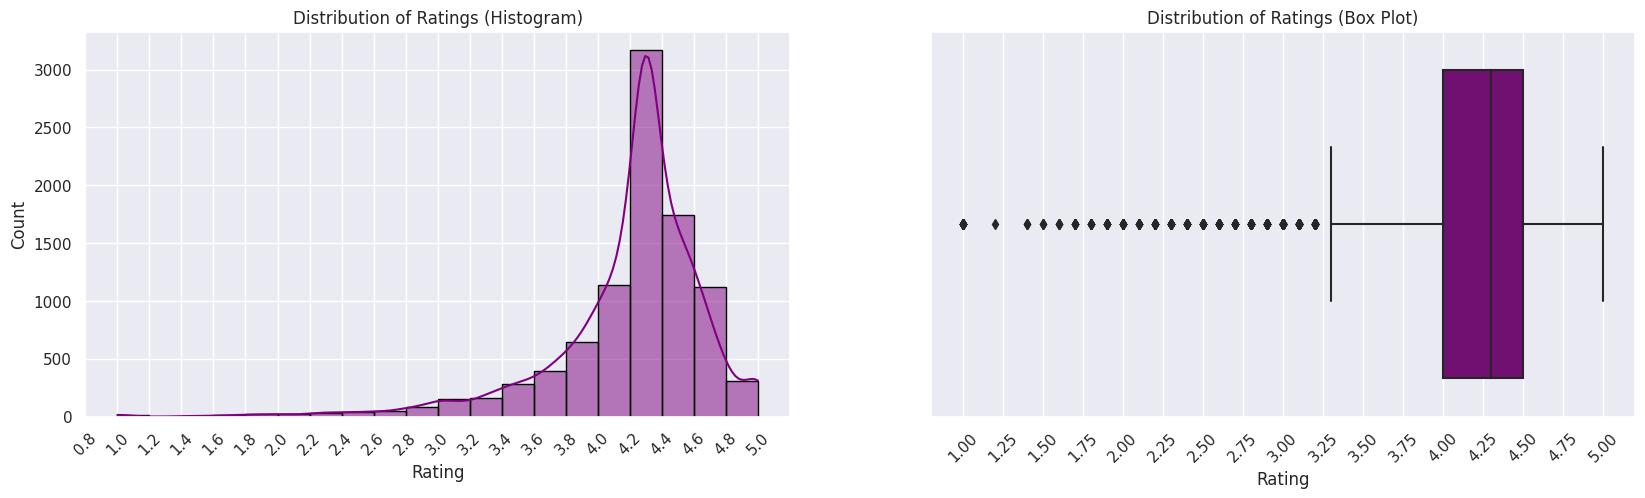

In [536]:
plt.figure(figsize = (20, 5))

plt.subplot(1, 2, 1)
plt.xticks(np.linspace(0, 5, 26), rotation = 45)
sns.histplot(x = ps_df['Rating'], color = 'purple', edgecolor = 'black', binwidth = 0.2, kde = True)
plt.title('Distribution of Ratings (Histogram)', fontsize = 12)

plt.subplot(1, 2, 2)
plt.xticks(np.linspace(0, 5, 21) , rotation = 45)
sns.boxplot(x = ps_df['Rating'], color = 'purple')
plt.title('Distribution of Ratings (Box Plot)', fontsize = 12)




We can see that:
* Most of the app's ratings lie between `4.2` and `4.4`.
* About 50% of the app's ratings lie `4.0` and `4.5`.
* The median rating is at about `4.3`.
* Except a few outliers, almost the apps have ratings between `3.25` and `5.00`.

#### **Chart - 9: Bar Plot - Number of Installs per Content Rating**

We are now interested in knowing for each Content Rating ('Everyone', 'Teen', etc) how many apps were installed.

Text(0.5, 1.0, 'Number of Installs per Content Rating')

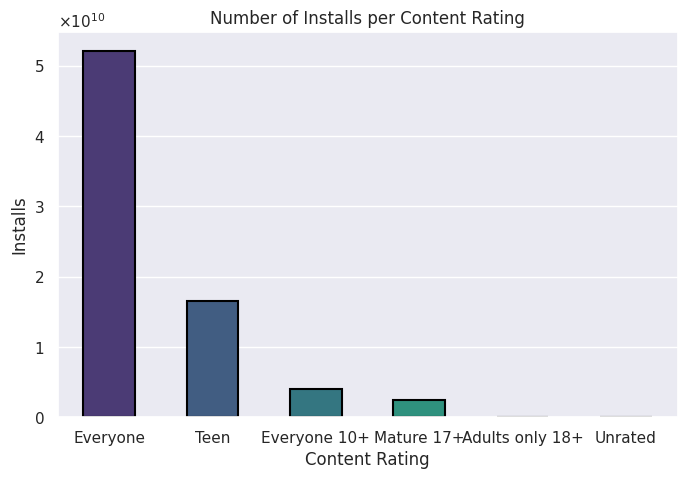

In [583]:
cr_install_df = ps_df.groupby(['Content Rating'])['Installs'].sum().to_frame().sort_values(by = 'Installs', ascending = False).reset_index()
plt.ticklabel_format(useMathText = True)
sns.set(rc={"figure.figsize":(8, 5)})
sns.barplot(data = cr_install_df, x = 'Content Rating', y = 'Installs', width = 0.5, palette = 'viridis', edgecolor='black', linewidth = 1.5)
plt.title('Number of Installs per Content Rating')

Majority of the installs were done from the `'Everyone'` content rating, followed by the `'Teen'` content rating.

The above insight goes on to show that the apps with a content rating of `'Everyone'` are used a lot by the general public, when compared to the apps with other content ratings.

#### **Chart - 10: Bar Plot - Number of Apps in Various Size Groups**

We need to seggregate the apps into different groups based on their range of size (like '1MB to 10MB') and check the number of apps lying in each of these groups.

In [538]:
def size_group(size):
  '''
  This function is used to seggreagate the apps into different size groups.
  The lower limit in the intervals is is inclusive, but the upper limit is not.
  '''
  if type(size) == float:
    if size < 1:
      return 'Less than 1MB'
    elif size >= 1 and size < 10:
      return '1MB to 10MB'
    elif size >= 10 and size < 20:
      return '10MB to 20MB'
    elif size >= 20 and size < 30:
      return '20MB to 30MB'
    elif size >= 30 and size < 40:
      return '30MB to 40MB'
    elif size >= 40 and size < 50:
      return '40MB to 50MB'
    elif size >= 50 and size < 60:
      return '50MB to 60MB'
    elif size >= 60 and size < 70:
      return '60MB to 70MB'
    elif size >= 70 and size < 80:
      return '70MB to 80MB'
    elif size >= 80 and size < 90:
      return '80MB to 90MB'
    elif size >= 90 and size < 100:
      return '90MB to 100MB'
    elif size <= 100:
      return 'Greater than or equal to 100MB'
  else:
    return 'Varies with device'

lst_of_grps = ['Less than 1MB', '1MB to 10MB', '10MB to 20MB', '20MB to 30MB', '30MB to 40MB', '40MB to 50MB', '50MB to 60MB', '60MB to 70MB', '70MB to 80MB', '80MB to 90MB', '90MB to 100MB', 'Varies with device']

Text(0.5, 1.0, 'Number of Apps in Various Size Groups')

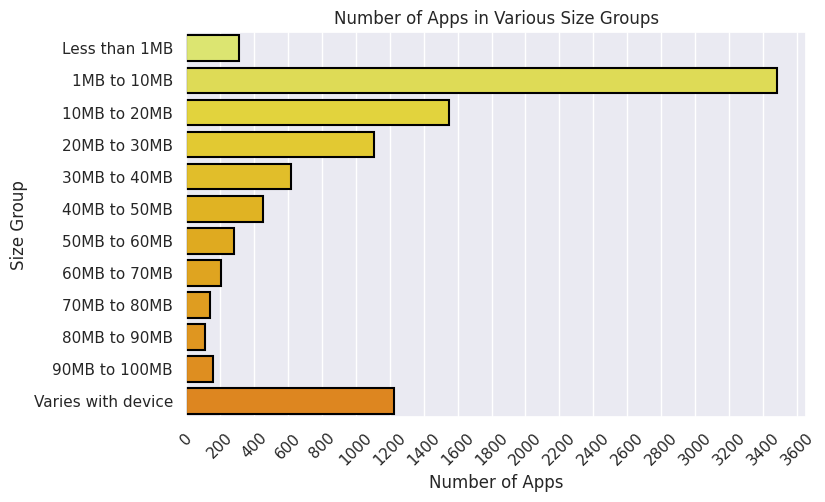

In [539]:
# Creating a new column in our Play Store dataframe:
ps_df['Size Group'] = ps_df['Size'].apply(size_group)

size_group_df = ps_df.groupby(['Size Group'])['App'].count().to_frame().rename(columns = {'App': 'Number of Apps'}).reset_index()
sns.barplot(data = size_group_df, y = 'Size Group', x = 'Number of Apps', order = lst_of_grps, edgecolor ='black', linewidth = 1.5, palette ='Wistia')
plt.xticks(range(0, 3800, 200), rotation = 45)
plt.title('Number of Apps in Various Size Groups', fontsize = 12)

So, most of the apps' size lies between `1MB to 10MB`.

#### **Chart - 11: Count Plot - Categories of the Large Sized Apps**

We are curious regarding the categories to which these large sized (more than 80 MB) apps belong to.

Text(0.5, 1.0, 'Categories of the Large Sized Apps')

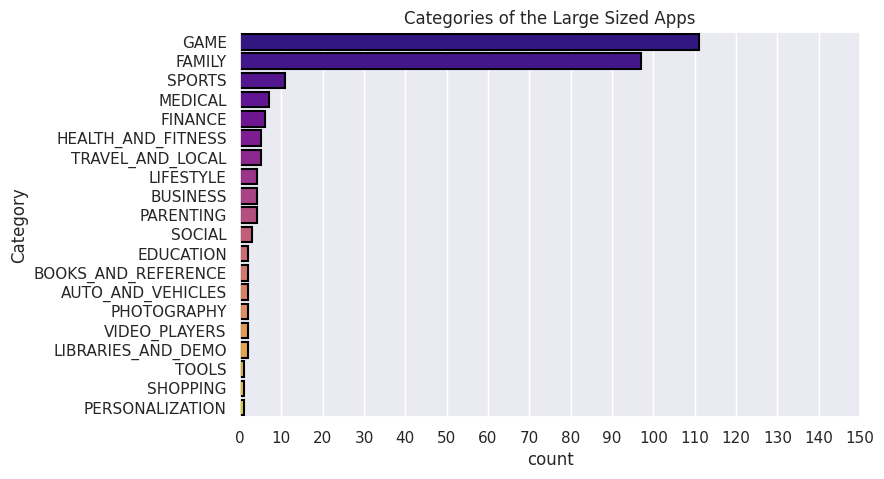

In [540]:
num_size_df = ps_df[ps_df['Size'] != 'Varies with device']
large_size_df = num_size_df[num_size_df['Size'] > 80].reset_index()

sns.countplot(data = large_size_df, y = 'Category', palette = 'plasma', edgecolor = 'black', linewidth = 1.5, order = large_size_df['Category'].value_counts().index)
plt.xticks(range(0, 160, 10))
plt.title('Categories of the Large Sized Apps', fontsize = 12)

As expected, most of these larger sized Apps belong to the `'Game'` category followed by the `'Family'` category, as the gaming apps tend to take much larger space in the phone memory.

This can give an idea to the developers regarding the memory requirements for their target app category.

#### **Chart - 12: Bar Plot - Genres and their Count**

Now, let's have a look at different genres and how common are those genres in the Play Store.

In [552]:
# Creating a list to store all the Genres:
genre_list = []

for index, row in ps_df.iterrows():
  for element in row['Genres']:
    genre_list.append(element)

# Creating a dictionary to store all the genres and their count:
genre_count_dict = {}
for element in set(genre_list):
  genre_count_dict[element] = genre_list.count(element)

# Coverting that dictionary to a dataframe:
genre_count_df = pd.DataFrame(pd.Series(genre_count_dict)).reset_index()
genre_count_df.columns = ['Genres', 'Count']
genre_count_df = genre_count_df.sort_values(by = 'Count', ascending = False).reset_index(drop = True)

Text(0.5, 1.0, 'Genres and their Count')

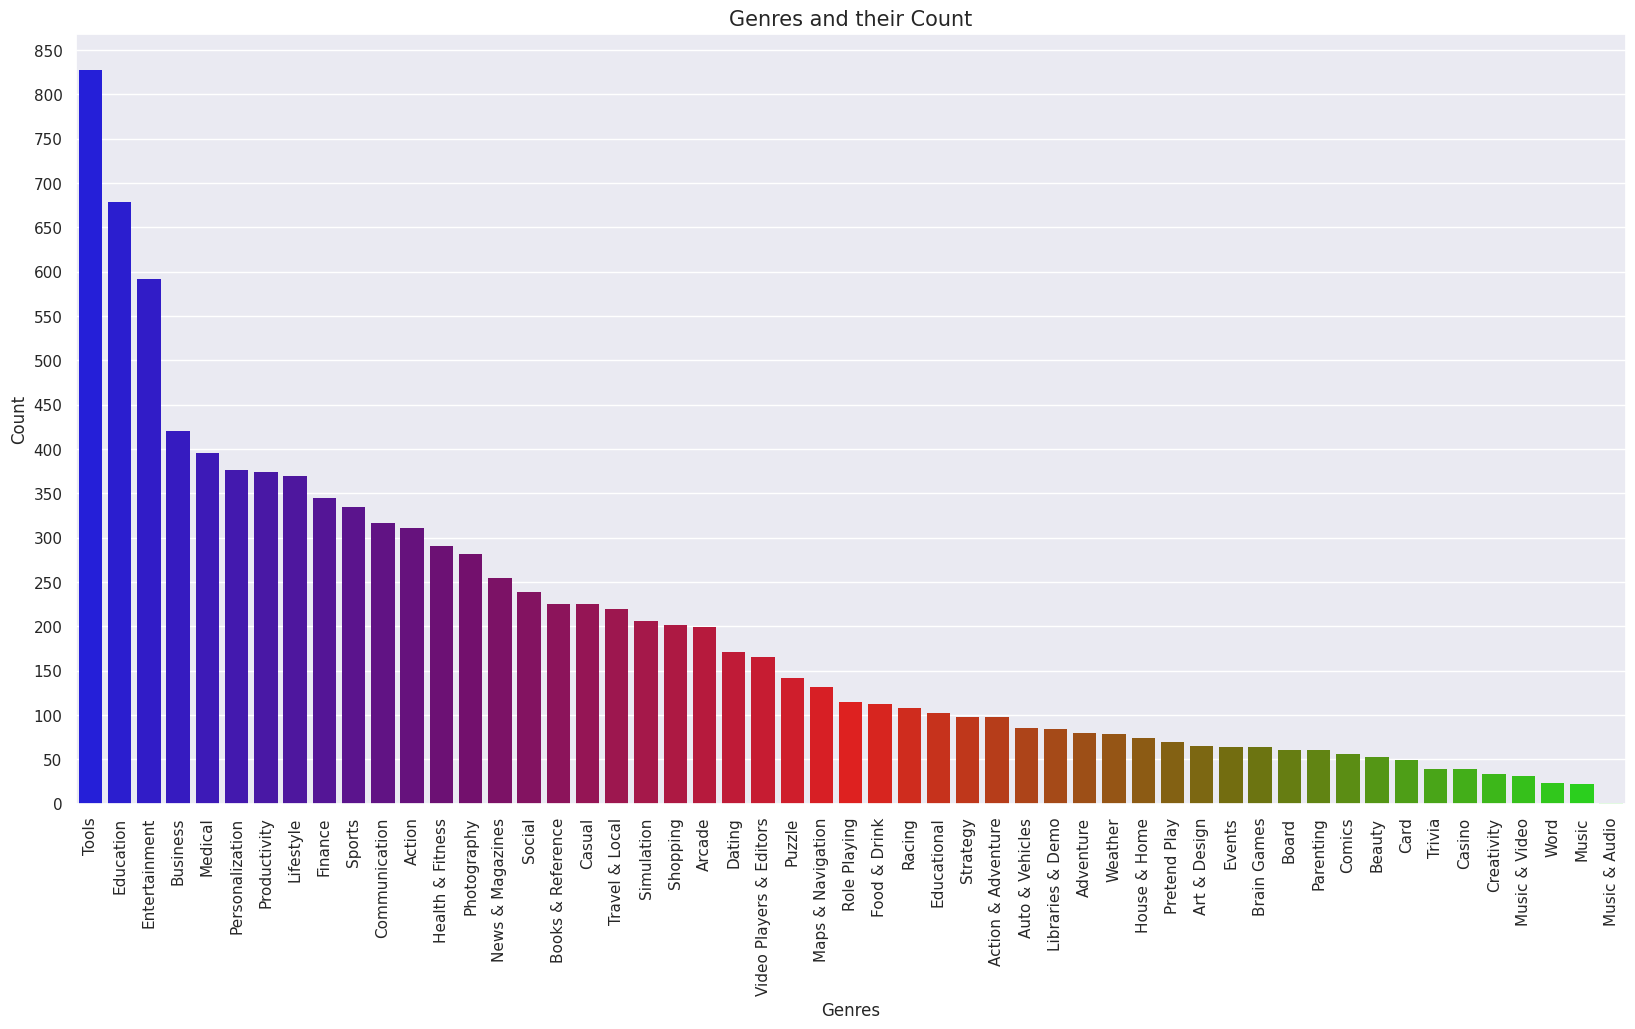

In [553]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(data = genre_count_df, x = 'Genres', y = 'Count', palette = 'brg', linewidth = 0)
plt.xticks(rotation = 90)
plt.yticks(range(0, 900, 50))
plt.title('Genres and their Count', fontsize = 15)

It can be observed that the following are the top 3 most common genres in the apps:
* `'Tools'`
* `'Education'`
* `'Entertainment'`

Although, I was expecting the genre of 'Music' to be fairly more common.

#### **Chart - 13: Bar Plot - The Top 5 Highest Grossing Apps**

Let's try to find the paid apps which have have earned the most. This can be determined by the number of installs and the price of the app.

In [543]:
# Creating a column called 'Total Earnings' in the dataframe containing the details about the paid apps only.
# The column 'Total Earning' would be a product of the 'Installs' and the 'Price' variable.
paid_ps_df['Total Earnings'] = paid_ps_df['Installs']*paid_ps_df['Price']

Text(0.5, 1.0, 'The Top 5 Highest Grossing Apps')

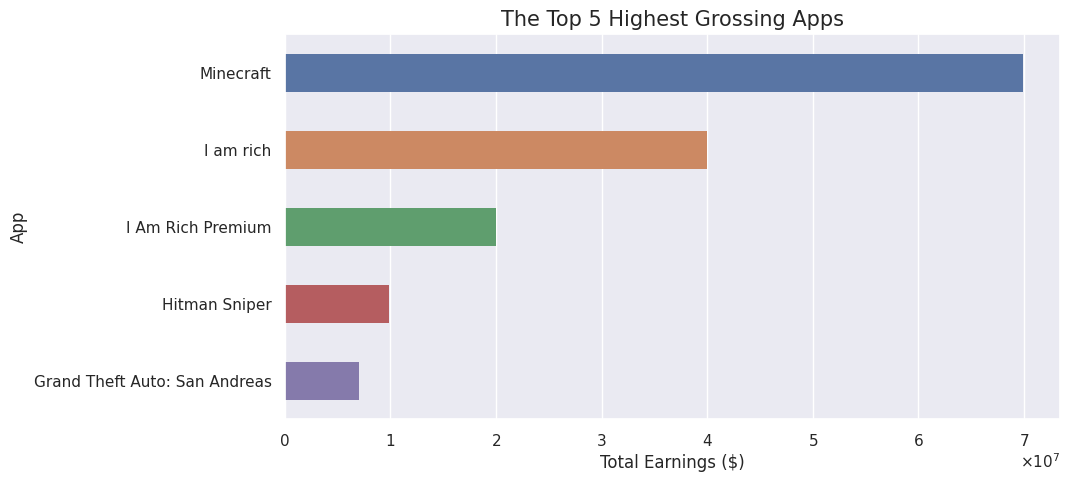

In [544]:
sns.set(rc={'figure.figsize':(10, 5)})
plt.ticklabel_format(useMathText = True)
sns.barplot(data = paid_ps_df.sort_values(by = 'Total Earnings', ascending = False).head(), x = 'Total Earnings', y = 'App', width = 0.5, linewidth = 0)
plt.xlabel('Total Earnings ($)')
plt.title('The Top 5 Highest Grossing Apps', fontsize = 15)

So, the chart is pretty self-explanatory. The top 5 comparatively highest grossing apps, i.e. the apps which have earned the most are:
* `'Minecraft'`
* `'I am rich'`
* `'I am Rich Premium'`
* `'Hitman Sniper'`
* `'Grand Theft Auto: San Andreas'`

#### **Chart - 14: Regression Plot - Change in Ratings with the Last Updated Year**

Let's explore how the number of installs change with respect to the last year the app was updated.

In [545]:
# Creating a new column in the original dataframe called 'Last Updated Year' by getting the year from the datetime objects under the 'Last Updated' column.
ps_df['Last Updated Year'] = ps_df['Last Updated'].apply(lambda x: x.year)

Text(0.5, 1.0, 'Change in Ratings with the Last Updated Year')

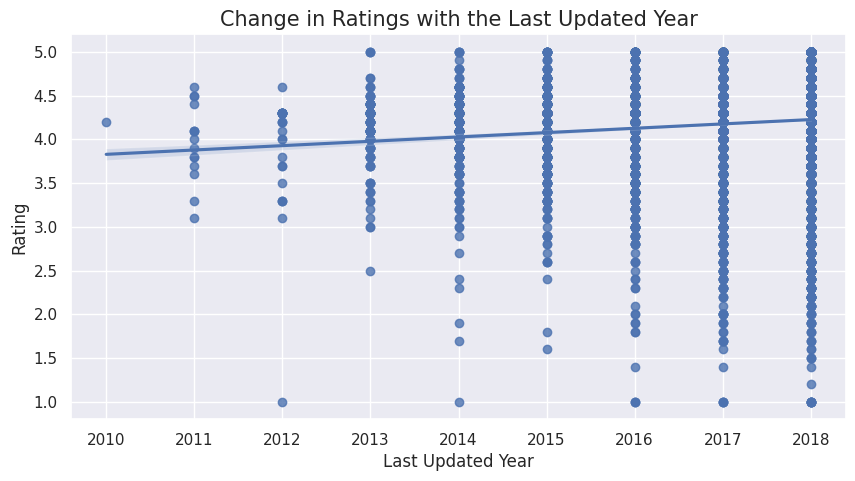

In [549]:
sns.regplot(data = ps_df, x = 'Last Updated Year', y = 'Rating')
plt.title('Change in Ratings with the Last Updated Year', fontsize = 15)

We can see a trend of the `'Ratings'` slightly increasing with increase in the `'Last Updated Year'`. This implies that for the most recently updated apps, the ratings may go up.

Let this insight be a lesson to the developers to keep updating their apps to receive good ratings from the users.

#### **Chart - 15: Regression Plot - Change in Ratings with Installs and Price**

Although we have briefly touched this topic, when we were exploring the correlation heatmap. It is time to analyse this more closely.

Text(0.5, 1.0, 'Change in Ratings with Price')

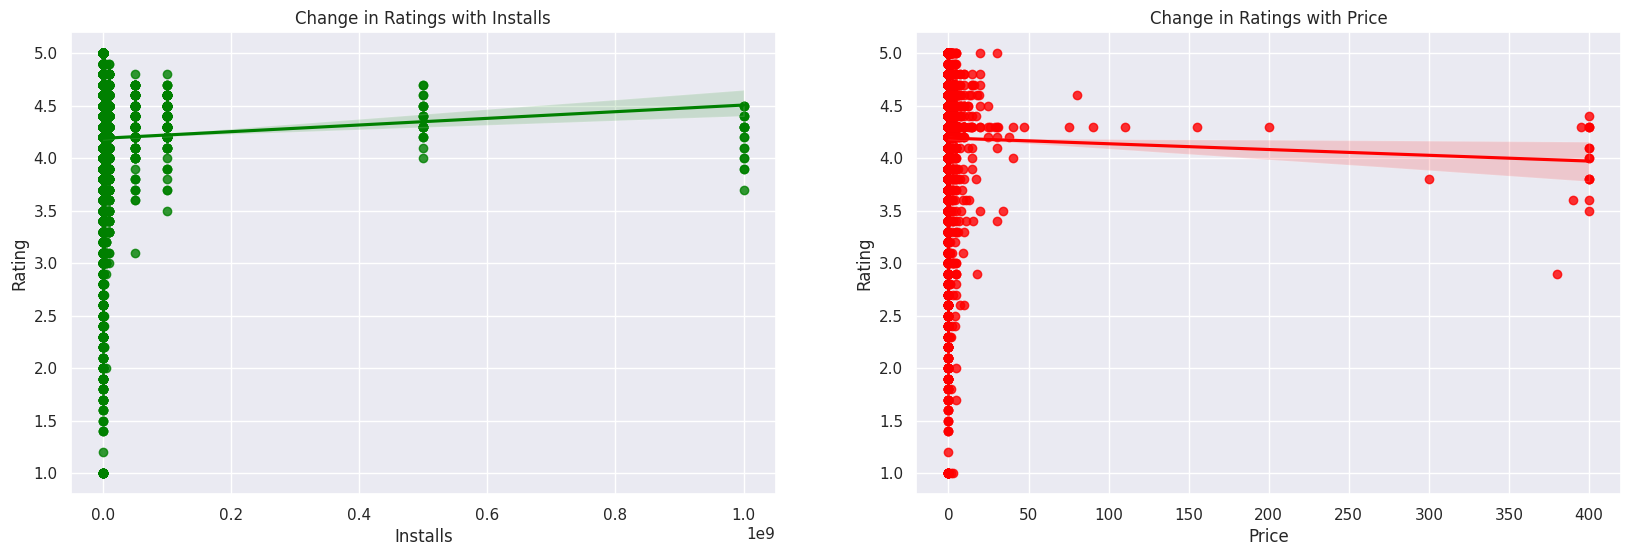

In [577]:
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.regplot(data = ps_df, x = 'Installs', y = 'Rating', scatter_kws={"color": "green"}, line_kws={"color": "green"})
plt.title('Change in Ratings with Installs', fontsize = 12)

plt.subplot(1, 2, 2)
sns.regplot(data = ps_df, x = 'Price', y = 'Rating', scatter_kws={"color": "red"}, line_kws={"color": "red"})
plt.title('Change in Ratings with Price', fontsize = 12)


* With the increase in the number of installs of the apps, there is a trend of ratings increasing too.
* With an increase in the price of the apps, the ratings tend to go down

#### Chart - 15 - Pair Plot 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***